In [15]:
%load_ext autoreload
%autoreload 2

%matplotlib inline


In [25]:
from exp.nb_00 import *
import operator

def test1(a,b,cmp,cname=None):
    if cname is None:cname=cmp.__name__
        
    assert cmp(a,b), f"{cname}:\n{a}\n{b}"
    
def test_eq(a,b): test1(a,b,operator.eq,'==')
    

In [130]:
!python notebook2script.py 01_UnitTesting.ipynb

Converted 01_UnitTesting.ipynb to exp\nb_01.py


In [28]:
test_eq(test,"TEST")

In [125]:
#export
from pathlib import Path
from IPython.core.debugger import set_trace
from fastai import datasets
import pickle, gzip, math, torch, matplotlib as mpl
import matplotlib.pyplot as plt
from torch import tensor

MNIST_URL = 'http://deeplearning.net/data/mnist/mnist.pkl'

In [30]:
path = datasets.download_data(MNIST_URL,ext='.gz'); path

WindowsPath('C:/Users/Sam.Macneil/.fastai/data/mnist.pkl.gz')

In [31]:
with gzip.open(path, 'rb') as f:
    ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding='latin-1')

In [32]:
x_train, y_train, x_valid, y_valid = map(tensor, (x_train,y_train,x_valid,y_valid))
n,c = x_train.shape
x_train, x_train.shape, y_train, y_train.shape, y_train.min(), y_train.max()

(tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 torch.Size([50000, 784]),
 tensor([5, 0, 4,  ..., 8, 4, 8]),
 torch.Size([50000]),
 tensor(0),
 tensor(9))

In [ ]:
# Let's test whether the number of rows equals the training shape, the number of columns is 28*28 (from our image shape),

In [33]:
assert n==y_train.shape[0]==50000
test_eq(c,28*28)
test_eq(y_train.min(),0)
test_eq(y_train.max(),9)

In [34]:
mpl.rcParams['image.cmap'] = 'gray'


In [35]:
img = x_train[0]


In [39]:
img.view(28,28).type()

'torch.FloatTensor'

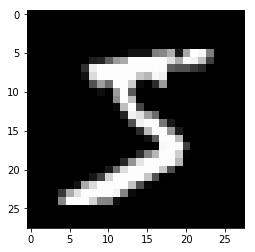

In [40]:
plt.imshow(img.view(28,28))

In [42]:
img.view??

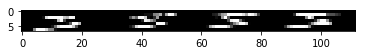

In [45]:
plt.imshow(img.view(-1,112))

In [46]:
weights = torch.randn(784,10)

In [48]:
bias = torch.zeros(10)

In [54]:
bias

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [63]:
bias.shape

torch.Size([10])

In [83]:
def matmul2(a,b):
    
    # how big are they
    # check that their dimensions are compatible
    ar,ac = a.shape
    br,bc = b.shape
    
    assert ac==br
    c = torch.zeros(ar,bc)
    for i in range(ar):
        for j in range(bc):
            for k in range(ac):
                c[i,j] += a[i,k] * b[k,j]
                
    return c
  
        
        
    

In [64]:
m1 = x_valid[:5]
m2 = weights

In [65]:
m1.shape, m2.shape

(torch.Size([5, 784]), torch.Size([784, 10]))

In [84]:
t1 = matmul2(m1,m2)

In [108]:
%timeit -n 10  _= matmul(m1,m2)

393 µs ± 195 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [87]:
t1

tensor([[ -8.2898,   6.1892,   2.8968,   0.9740, -21.6833,  10.6197,   7.3075,
           8.9773,  12.7313,  -4.2296],
        [-12.1347,  16.0648,   2.6480,   2.5760, -14.4232,   9.9838,  -4.0510,
          -2.8991,  14.9234,   5.0424],
        [ -5.6448,   6.6650,  -1.1159,   1.9044, -15.8793,   3.8761,  -1.7822,
          10.5692,   4.7390,  -3.8989],
        [ -8.2422,  11.1564,   1.5205,   6.3150,  -3.4319,   2.8112,  -1.5049,
           2.0394,   1.1134,  10.0402],
        [ -6.8079,  12.7759,   7.7129,  -2.0593, -23.8173,  -5.0870,  -7.1003,
          -2.9814,  -4.8161,   3.3802]])

In [107]:
def matmul(a,b):
    
    # how big are they
    # check that their dimensions are compatible
    ar,ac = a.shape
    br,bc = b.shape
    
    assert ac==br
    c = torch.zeros(ar,bc)
    for i in range(ar):
        
        #c[i,j] = (a[i,:] * b[:,j]).sum()
        c[i,:] = (a[i,:].unsqueeze(-1) * b).sum(dim=0)
                
    return c

In [112]:
a = tensor([2,3])

In [115]:
b = tensor([[3,5],[6,9]])

In [116]:
a.unsqueeze(-1).expand_as(b)


tensor([[2, 2],
        [3, 3]])

In [92]:
def near(a,b): 
    return torch.allclose(a,b,rtol=1e-3,atol=1e-5)
def test_near(a,b): 
    test1(a,b,near)

In [93]:
test_near(t1,matmul(m1,m2))

In [94]:
c = tensor([10.,20,30]); c

tensor([10., 20., 30.])

In [96]:
c.shape

torch.Size([3])

In [104]:
c.unsqueeze(0).shape

torch.Size([1, 3])

In [102]:
c[None,:].shape

torch.Size([1, 3])

In [105]:
c[:,None].shape

torch.Size([3, 1])

In [106]:
c.unsqueeze(1).shape

torch.Size([3, 1])

In [117]:
def matmul(a,b): return torch.einsum('ik,kj->ij', a, b)

In [120]:
%timeit -n 10 _=matmul(m1,m2)

38.7 µs ± 3.33 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [122]:
%timeit -n 10 t2 = m1.matmul(m2)

6.74 µs ± 4.33 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [123]:
t2 = m1@m2

In [124]:
t2

tensor([[ -8.2898,   6.1892,   2.8968,   0.9740, -21.6833,  10.6197,   7.3075,
           8.9773,  12.7313,  -4.2296],
        [-12.1347,  16.0648,   2.6480,   2.5760, -14.4232,   9.9838,  -4.0510,
          -2.8991,  14.9234,   5.0424],
        [ -5.6448,   6.6650,  -1.1159,   1.9044, -15.8793,   3.8761,  -1.7822,
          10.5692,   4.7390,  -3.8989],
        [ -8.2422,  11.1564,   1.5205,   6.3150,  -3.4319,   2.8112,  -1.5049,
           2.0394,   1.1134,  10.0402],
        [ -6.8079,  12.7759,   7.7129,  -2.0593, -23.8173,  -5.0870,  -7.1003,
          -2.9814,  -4.8161,   3.3802]])